In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def plot_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.show()

In [3]:
image = mpimg.imread('images/tiger.jpg')
image.shape

(460, 460, 3)

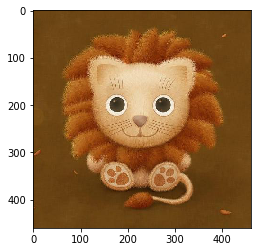

In [4]:
plot_image(image)

### Resizing Image

In [5]:
resized_image = tf.image.resize_images(image, [100, 100], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
resized_image

<tf.Tensor 'Squeeze:0' shape=(100, 100, 3) dtype=uint8>

In [6]:
resized_image_with_corners = tf.image.resize_images(image, [100, 150],
                                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR, align_corners=True)
resized_image_with_corners

<tf.Tensor 'Squeeze_1:0' shape=(100, 150, 3) dtype=uint8>

In [7]:
resize_area = tf.image.resize_area(tf.reshape(image, [1, 460, 460, 3]), [100, 100])
resize_area

<tf.Tensor 'ResizeArea:0' shape=(1, 100, 100, 3) dtype=float32>

In [8]:
resize_bicubic = tf.image.resize_bicubic(tf.reshape(image, [1, 460, 460, 3]), [100, 100])
resize_bicubic

<tf.Tensor 'ResizeBicubic:0' shape=(1, 100, 100, 3) dtype=float32>

In [9]:
resize_bilinear = tf.image.resize_bilinear(tf.reshape(image, [1, 460, 460, 3]), [100, 100])
resize_bilinear

<tf.Tensor 'ResizeBilinear:0' shape=(1, 100, 100, 3) dtype=float32>

In [10]:
resize_nearest_neighbor = tf.image.resize_nearest_neighbor(tf.reshape(image, [1, 460, 460, 3]), [100, 100])
resize_nearest_neighbor

<tf.Tensor 'ResizeNearestNeighbor_2:0' shape=(1, 100, 100, 3) dtype=uint8>

Normal resize
(100, 100, 3)


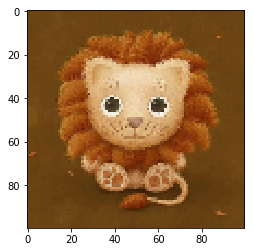

Resize with align corners
(100, 150, 3)


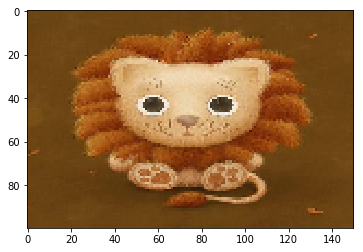

Resize area
(1, 100, 100, 3)


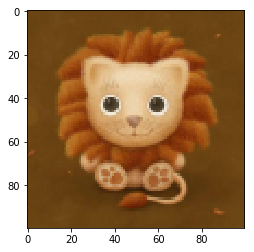

Resize bicubic
(1, 100, 100, 3)


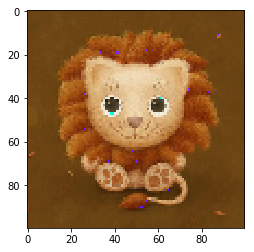

Resize bilinear
(1, 100, 100, 3)


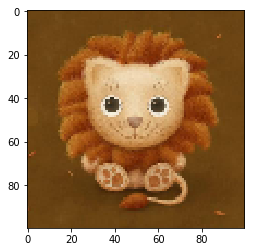

Resize nearest neighbor
(1, 100, 100, 3)


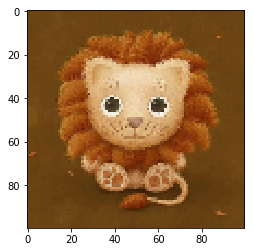

In [11]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print("Normal resize")
    image1 = sess.run(resized_image)
    print(image1.shape)
    plot_image(image1)
    
    print("Resize with align corners")
    image1_1 = sess.run(resized_image_with_corners)
    print(image1_1.shape)
    plot_image(image1_1)
    
    print("Resize area")
    image2 = sess.run(resize_area)
    print(image2.shape)
    plot_image(np.reshape(image2, [100, 100, 3]))
    
    print("Resize bicubic")
    image3 = sess.run(resize_bicubic)
    print(image3.shape)
    plot_image(np.reshape(image3, [100, 100, 3]))
    
    print("Resize bilinear")
    image4 = sess.run(resize_bilinear)
    print(image4.shape)
    plot_image(np.reshape(image4, [100, 100, 3]))
    
    print("Resize nearest neighbor")
    image5 = sess.run(resize_nearest_neighbor)
    print(image5.shape)
    plot_image(np.reshape(image5, [100, 100, 3]))

### Cropping Images

In [12]:
# Original height and width are greater than the target height and width -> cropping
resize_image_with_crop = tf.image.resize_image_with_crop_or_pad(tf.reshape(image, [1, 460, 460, 3]), 100, 150)
resize_image_with_crop

<tf.Tensor 'control_dependency_3:0' shape=(1, 100, 150, 3) dtype=uint8>

In [13]:
# Original height and width are smaller than the target height and width -> padding
resize_image_with_pad = tf.image.resize_image_with_crop_or_pad(tf.reshape(image, [1, 460, 460, 3]), 500, 500)
resize_image_with_pad

<tf.Tensor 'control_dependency_7:0' shape=(1, 500, 500, 3) dtype=uint8>

In [14]:
central_crop = tf.image.central_crop(image, 0.4)
central_crop

<tf.Tensor 'Slice_2:0' shape=(?, ?, 3) dtype=uint8>

In [15]:
pad_to_bounding_box = tf.image.pad_to_bounding_box(image, 120, 180, 1200, 1200)
pad_to_bounding_box

<tf.Tensor 'Squeeze_2:0' shape=(1200, 1200, 3) dtype=uint8>

In [16]:
crop_to_bounding_box = tf.image.crop_to_bounding_box(image, 120, 180, 200, 250)
crop_to_bounding_box

<tf.Tensor 'Squeeze_3:0' shape=(200, 250, 3) dtype=uint8>

Cropping
(1, 100, 150, 3)


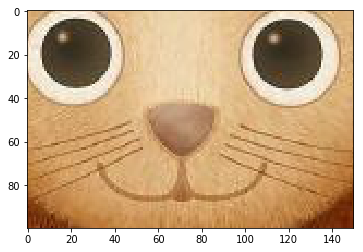

Padding
(1, 500, 500, 3)


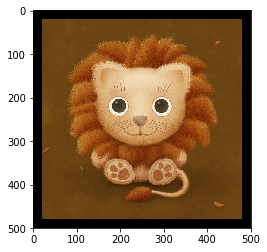

Central crop
(184, 184, 3)


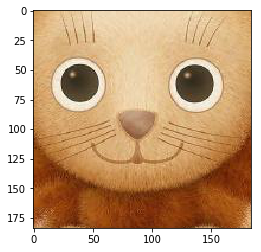

Pad to bounding box
(1200, 1200, 3)


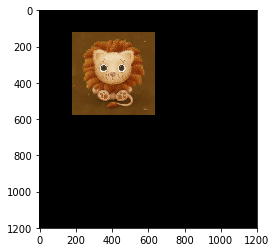

Crop to bounding box
(200, 250, 3)


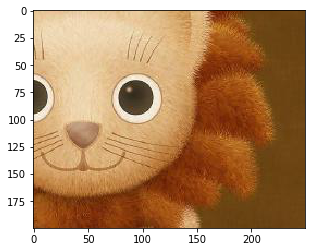

In [17]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print("Cropping")
    image1_1 = sess.run(resize_image_with_crop)
    print(image1_1.shape)
    plot_image(np.reshape(image1_1, [100, 150, 3]))
    
    print("Padding")
    image1_2 = sess.run(resize_image_with_pad)
    print(image1_2.shape)
    plot_image(np.reshape(image1_2, [500, 500, 3]))
    
    print("Central crop")
    image2 = sess.run(central_crop)
    print(image2.shape)
    plot_image(image2)
    
    print("Pad to bounding box")
    image3 = sess.run(pad_to_bounding_box)
    print(image3.shape)
    plot_image(image3)
    
    print("Crop to bounding box")
    image4 = sess.run(crop_to_bounding_box)
    print(image4.shape)
    plot_image(image4)

### Resize and Crop (Scale) images

Crop shape: (4, 200, 200, 3) 



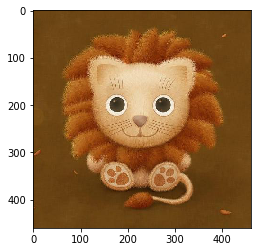

Scale: 0.9
Box: [ 0.05        0.05        0.94999999  0.94999999]


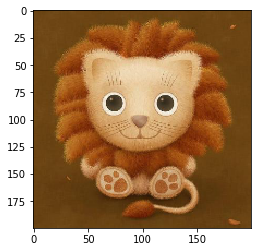

Scale: 0.75
Box: [ 0.125  0.125  0.875  0.875]


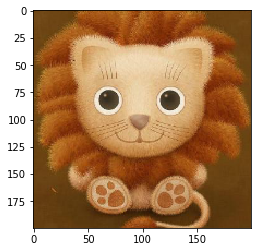

Scale: 0.5
Box: [ 0.25  0.25  0.75  0.75]


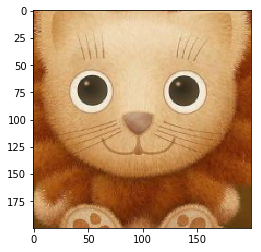

Scale: 0.25
Box: [ 0.375  0.375  0.625  0.625]


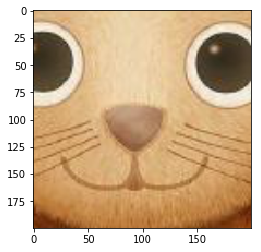

In [18]:
original_height = 460
original_width = 460

# Height and width of the crop
crop_height = 200
crop_width = 200

# The number of bounding boxes
# Each box is 1-D tensor in the form of [y_min, x_min, y_max, x_max]
# Box coordinates will be in the interval [0.0, 1.0] relative to original heigt and width of the image
# If an image is 100 x 200 pixels and the bounding box is [0.1, 0.2, 0.5, 0.9], the bottom-left 
# and upper-right coordinates of the bounding box will be (10, 40) to (50, 180)
# Note that bounding boxes may fall out of the image
n_boxes = 4

# We have only one image
n_batches = 1

start = 0.5 # use 0.5 for centrally scaling
scales = [0.9, 0.75, 0.5, 0.25]

test_boxes = np.zeros([n_boxes, 4], dtype=np.float32)
for idx, scale in enumerate(scales):
    y1 = x1 = start - start * scale
    y2 = x2 = start + start * scale
    test_boxes[idx] = np.array([y1, x1, y2, x2], dtype=np.float32)

X = tf.placeholder(tf.float32, [n_batches, original_height, original_width, 3])
boxes = tf.placeholder(tf.float32, [n_boxes, 4])
draw_boxes = tf.placeholder(tf.float32, [n_batches, n_boxes, 4])
box_id = tf.zeros([n_boxes], dtype=tf.int32)
crop_size = tf.constant([crop_height, crop_width])

op = tf.image.crop_and_resize(X, boxes, box_id, crop_size)
draw_op = tf.image.draw_bounding_boxes(X, draw_boxes)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
        
    crops = sess.run(op, feed_dict={X: image.reshape(n_batches, original_height, original_width, 3),
                                    boxes: test_boxes})
    
    print("Crop shape:", crops.shape, "\n")
    plot_image(image)
    for idx, crop in enumerate(crops):
        print("Scale:", scales[idx])
        print("Box:", test_boxes[idx])
        plot_image(crop)

with tf.Session() as sess:
    init.run()
    test_boxes = test_boxes.reshape(n_batches, n_boxes, 4)
    bounding_boxes = sess.run(draw_op, feed_dict={X: image.reshape(n_batches, original_height, original_width, 3),
                                                  draw_boxes: test_boxes})
    img = bounding_boxes.reshape(original_height, original_width, 3)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite("images/cropped_and_resized.jpg", rgb_img)

Bounding boxes:


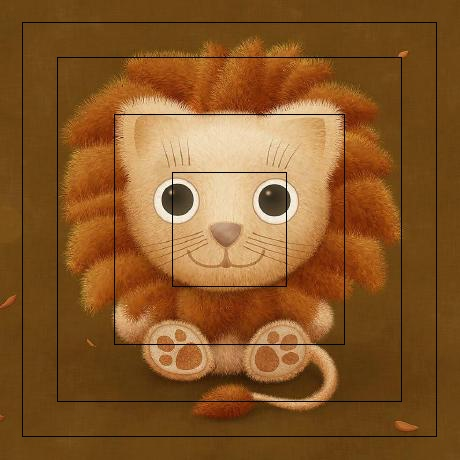

In [19]:
from IPython.display import Image
print("Bounding boxes:")
Image("images/cropped_and_resized.jpg")

### Extract Glimpse

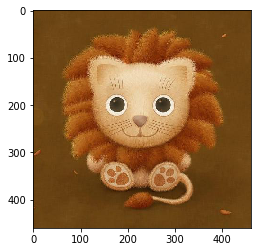

Shape: (1, 100, 200, 3)


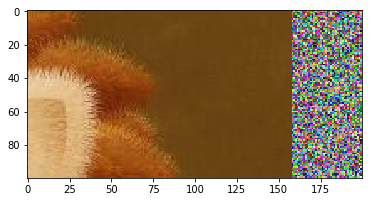

In [54]:
# https://www.tensorflow.org/api_docs/python/tf/image/extract_glimpse

glimpse_height = 100
glimpse_width = 200

offset_height = -0.5
offset_width = 0.75

# 1-D tensor with two elements: glimpse height and glimpse width
size = tf.placeholder(tf.int32, [2])
offsets = tf.placeholder(tf.float32, [n_batches, 2])

extract_glimpse_op = tf.image.extract_glimpse(X, size, offsets)

with tf.Session() as sess:
    init.run()
    img = image.reshape(n_batches, original_height, original_width, 3)
    glimpse = sess.run(extract_glimpse_op, feed_dict={X: img,
                                                      size: np.array([glimpse_height, glimpse_width]), 
                                                      offsets: np.array([[offset_height, offset_width]])})
    plot_image(image)
    print("Shape:", glimpse.shape)
    plot_image(glimpse.reshape(glimpse_height, glimpse_width, 3))